- Imports: prep a requirements.txt file with download links for both Windows and Mac (download Anaconda + Seaborn)
- While people are downloading, quick intro to Pandas for anyone who hasn't used it before (Python package created for stocks/trading -- great for an initial exploratory data analysis) and EDA (EDA is an iterative process where you're trying to firm up your hypotheses through initial examination of the data, usually through visualizations)

In [1]:
#imports a bunch of packages
import pandas as pd #pandas is the package we're going to be using the most of!
import matplotlib.pyplot as plt #
import seaborn as sns
plt.style.use('ggplot')
% matplotlib inline

In [2]:
#we'll start off by loading our dataset
#pandas makes it incredibly easy to load CSVs, tabular data, json files, etc. 
#pandas can read a file from a local computer or directly from a URL
df = pd.read_csv('/Users/rb/Downloads/Washington_DC_Public_Art.csv') #assign the CSV we're going to work on to the variable DF

In [3]:
df.head() #this command let's us see the first 5 rows of data
#it's good practice to run this right at the beginning to double-check everything looks as we expect it to

,X,Y,OBJECTID,ADDRESS,ARTIST,TITLE,MEDIUM,YEAR,ART_TYPE,DISPLAY,LOCATION,NEIGHBORHOOD,SIZE_,WARD,DURATION,PROGRAM_SOURCE,ARTWORK
0,-77.023515,38.914256,1,813 S STREET NW,Richard Colman,Checker Club,Aerosol paint,2011,Mural,"Capitol Pool Checkers Club, located at back of...",813 s street nw,shaw,NaN,1,Temporary,MuralsDC,NaN
1,-76.986446,38.867187,2,1320 GOOD HOPE ROAD SE,"Helping Inner City Youth Succeed, Hicks",Untitled,Aerosol paint,2009,Mural,African Heritage Center for African Dance & Mu...,1320b good hope road se,anacostia,1209 sq. ft.,8,Temporary,MuralsDC,NaN
2,-76.995284,38.879775,3,745 8TH STREET SE,Michael Hammond,Depiction of the House’s Go-go Band,Aerosol paint on concrete,2011,Mural,"Sasha Bruce House, mural located on front of b...",745 8th street se,capitol hill,140 sq. feet,6,Permanent,Commissioned Project,NaN
3,-77.001522,38.957041,4,320 RIGGS ROAD NE,Joel Bergner and Rashad Cuffee,Life Makes Music,Aerosol paint,2008,Mural,Off the intersection at South Dakota Ave NE & ...,357 riggs road ne,petworth,NaN,4,Temporary,Neighborhood Projects,NaN
4,-77.016780,38.974892,5,314 CARROLL STREET NW,"Words, Beats and Life",Takoma Green,Aerosol paint,2009,Mural,"Elevation 314, mural is located behind 314 Car...",314 carroll street nw,takoma,150 x 10',4,Temporary,Neighborhood Projects,NaN


In [4]:
df.tail(10) #this lets us see the last 10 rows -- 5 is the default but you can specify a number in the parentheses and pull a specific number

,X,Y,OBJECTID,ADDRESS,ARTIST,TITLE,MEDIUM,YEAR,ART_TYPE,DISPLAY,LOCATION,NEIGHBORHOOD,SIZE_,WARD,DURATION,PROGRAM_SOURCE,ARTWORK
262,-77.001098,38.873324,263,10 WATER STREET (East Lawn),Tattfoo Tan,S.O.S. p:ARK,"Plants: St Johnwort, dandelions, timothy, clov...",2012,Earth work,Yards Park,10 Water Street SE (East Lawn),Navy Yard,NaN,6,Temporary,2012- 5x5 Temporary Art Initiative,http://octo.dc.gov/sites/default/files/dc/site...
263,-77.027564,38.894107,264,1100 PENNSYLVANIA AVENUE NW,Wilmer Wilson IV,Henry 'Box' Brown: FOREVER,"Performance, three grades of postage stamps",2012,Performance,Old Post Office Pavilion,1100 Pennsylvania Avenue NW,Downtown,NaN,2,Temporary,2012- 5x5 Temporary Art Initiative,http://octo.dc.gov/sites/default/files/dc/site...
264,-77.024769,38.898699,265,901 G STREET NW,Lize Mogel,Sight Lines,Self guided tour maps,2012,Tour,Martin Luther King Jr Memorial Library,901 G Street NW,Downtown,NaN,2,Temporary,2012- 5x5 Temporary Art Initiative,http://octo.dc.gov/sites/default/files/dc/site...
265,-76.941819,38.912634,266,1550 ANACOSTIA AVENUE NE,Mia Feuer,The Flooded Lecture Series,"Lecture, panel discussion",2014,Lecture,NaN,"Kenilworth Park, Anacostia River",Kenilworth,NaN,7,Temporary,2014- 5x5 Temporary Art Initiative,http://octo.dc.gov/sites/default/files/dc/site...
266,-76.932158,38.908452,267,1350 49TH STREET NE,Lize Mogel,Sight Lines,Self guided tour maps,2012,Tour,Deadwood Neighborhood Library,Deadwood Neighborhood Library,Deanwood,NaN,7,Temporary,2012- 5x5 Temporary Art Initiative,http://octo.dc.gov/sites/default/files/dc/site...
267,-77.039743,38.895854,268,500 17TH STREET NW,Floating Lab Collective,Remuseum,"Lecture, panel discussion",2012,Lecture,Corcoran Gallery of Art,500 17th Street NW,Downtown,NaN,2,Temporary,2012- 5x5 Temporary Art Initiative,http://octo.dc.gov/sites/default/files/dc/site...
268,-77.000970,38.947387,269,4900 JOHN MCCORMACK DR NE,Coby Kennedy,Untitled,Aerosol paint,2011,Mural,"Department of Pulbic Works, wall along Ft. Tot...",4900 John MCcormack Dr NE,Fort Totten,NaN,5,Temporary,MuralsDC,NaN
269,-77.005888,38.906849,270,1ST STREET NE FROM N STREET NE TO PATTERSON ST...,Dignidad Rebelde,"Looking Back, Seeing Forward","Paint, prints",2014,Mural,Installed on a separation wall,1ST Street NE From N Street NE To Patterson St...,NoMa,NaN,6,Temporary,2012- 5x5 Temporary Art Initiative,http://octo.dc.gov/sites/default/files/dc/site...
270,-77.022221,38.912450,271,1630 7TH STREET NW,Lize Mogel,Sight Lines,Self guided tour maps,2012,Tour,Watha T. Daniel / Shaw Neighborhood Library,1630 7th St NW,Logan Circle/Shaw,NaN,6,Temporary,2012- 5x5 Temporary Art Initiative,http://octo.dc.gov/sites/default/files/dc/site...
271,-77.022942,38.899143,272,8TH STREET NW FROM G STREET NW TO H STREET NW,Floating Lab Collective,Remuseum,"Lecture, panel discussion",2012,Lecture,Pepco Edison Place Gallery,8TH Street NW From G Street NW To H Street NW,Chinatown,NaN,2,Temporary,2012- 5x5 Temporary Art Initiative,http://octo.dc.gov/sites/default/files/dc/site...


In [5]:
#we can take a look at what each column is without having to scroll
df.columns

Index([u'X', u'Y', u'OBJECTID', u'ADDRESS', u'ARTIST', u'TITLE', u'MEDIUM',
       u'YEAR', u'ART_TYPE', u'DISPLAY', u'LOCATION', u'NEIGHBORHOOD',
       u'SIZE_', u'WARD', u'DURATION', u'PROGRAM_SOURCE', u'ARTWORK'],
      dtype='object')

In [6]:
#and check how many total rows and columns we have
print df.shape
#and how many of those rows are missing values
df.isnull().sum()

(272, 17)


X                   0
Y                   0
OBJECTID            0
ADDRESS             0
ARTIST              3
TITLE               1
MEDIUM              3
YEAR                1
ART_TYPE            1
DISPLAY             5
LOCATION            0
NEIGHBORHOOD        0
SIZE_             146
WARD                0
DURATION            0
PROGRAM_SOURCE      0
ARTWORK           176
dtype: int64

In [7]:
#and check the data type of each column
df.dtypes
#floats are numbers with fractional parts/decimals (3.14, for example)
#ints are whole numbers (3)
#objects in pandas usually mean this is a string (characters)

X                 float64
Y                 float64
OBJECTID            int64
ADDRESS            object
ARTIST             object
TITLE              object
MEDIUM             object
YEAR               object
ART_TYPE           object
DISPLAY            object
LOCATION           object
NEIGHBORHOOD       object
SIZE_              object
WARD                int64
DURATION           object
PROGRAM_SOURCE     object
ARTWORK            object
dtype: object

In [8]:
#we can also check how many unique items there are in a pandas series/column
for item in df:
    print item
    print df[item].nunique()

X
223
Y
223
OBJECTID
272
ADDRESS
221
ARTIST
169
TITLE
213
MEDIUM
145
YEAR
26
ART_TYPE
42
DISPLAY
233
LOCATION
228
NEIGHBORHOOD
99
SIZE_
121
WARD
8
DURATION
2
PROGRAM_SOURCE
16
ARTWORK
52


In [9]:
#and how many occurrences of each value there are in each series (pandas' terminology for column)
df.PROGRAM_SOURCE.value_counts()

2012- 5x5 Temporary Art Initiative    72
MuralsDC                              48
Neighborhood Projects                 28
2014- 5x5 Temporary Art Initiative    24
Commissioned Project                  20
Community Initiatives                 17
PABC Grant                            17
Art in the Metro                      16
Inter District DPR                    10
Downtown Projects                      7
Inter District DMPED                   5
Inter District DCPL                    3
Art Bank                               2
Intra District DDOT                    1
Golden Triangle Bid                    1
Intra District DPR                     1
Name: PROGRAM_SOURCE, dtype: int64

In [10]:
#typing everything in ALL CAPS is annoying, so let's convert all the column headings to lower case
#save the column names as lower-case strings
df.columns = df.columns.str.lower()

In [11]:
#double-check to see if we accomplished this
df.head(2)

,x,y,objectid,address,artist,title,medium,year,art_type,display,location,neighborhood,size_,ward,duration,program_source,artwork
0,-77.023515,38.914256,1,813 S STREET NW,Richard Colman,Checker Club,Aerosol paint,2011,Mural,"Capitol Pool Checkers Club, located at back of...",813 s street nw,shaw,NaN,1,Temporary,MuralsDC,NaN
1,-76.986446,38.867187,2,1320 GOOD HOPE ROAD SE,"Helping Inner City Youth Succeed, Hicks",Untitled,Aerosol paint,2009,Mural,African Heritage Center for African Dance & Mu...,1320b good hope road se,anacostia,1209 sq. ft.,8,Temporary,MuralsDC,NaN


In [12]:
#pandas can also be great for data cleaning. here i'm dropping 3 rows that i'd identified with mistakes in the years column/series
df = df.drop(df.index[[154, 54, 149, 130]])

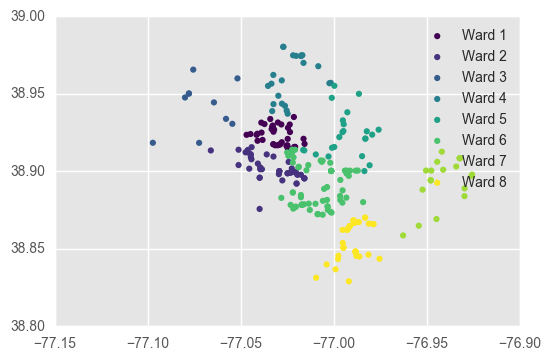

In [36]:
#before we get started, let's map out all art work
#code 100% taken from stackoverflow
cmap = plt.cm.viridis #this sets the colourmap we want
norm = plt.Normalize(df['ward'].values.min(), df['ward'].values.max()) #this normalizes our colourmap (sets all the values between 0 and 1)

for i, dff in df.groupby("ward"): #we iterate through a filtered dataframe
    plt.scatter(dff['x'], dff['y'], c=cmap(norm(dff['ward'])), #then say that we want a scatter plot of x against y with each ward as a colour
                edgecolors='none', label="Ward {:g}".format(i)) #and then we specify that our labels should say "Ward + ward number"

plt.legend() #this is what we add to make sure we can see a legend

## Let's start off with framing a few questions we have of the dataset  
1) Which neighbourhoods have the most public art in DC?  
2) Were particular mediums of art more popular in certain years?  
3) Which areas have the most permanent exhibits?  
4) Are certain mediums more common in specific areas?  
5) Has there been an increase in the amount of public art in DC over the years?  

#### 1) Which neighbourhoods have the most public art in DC?

In [40]:
#lowering all the strings in neighbourhoods to avoid some of the duplicate names
df.neighborhood = df.neighborhood.str.lower()

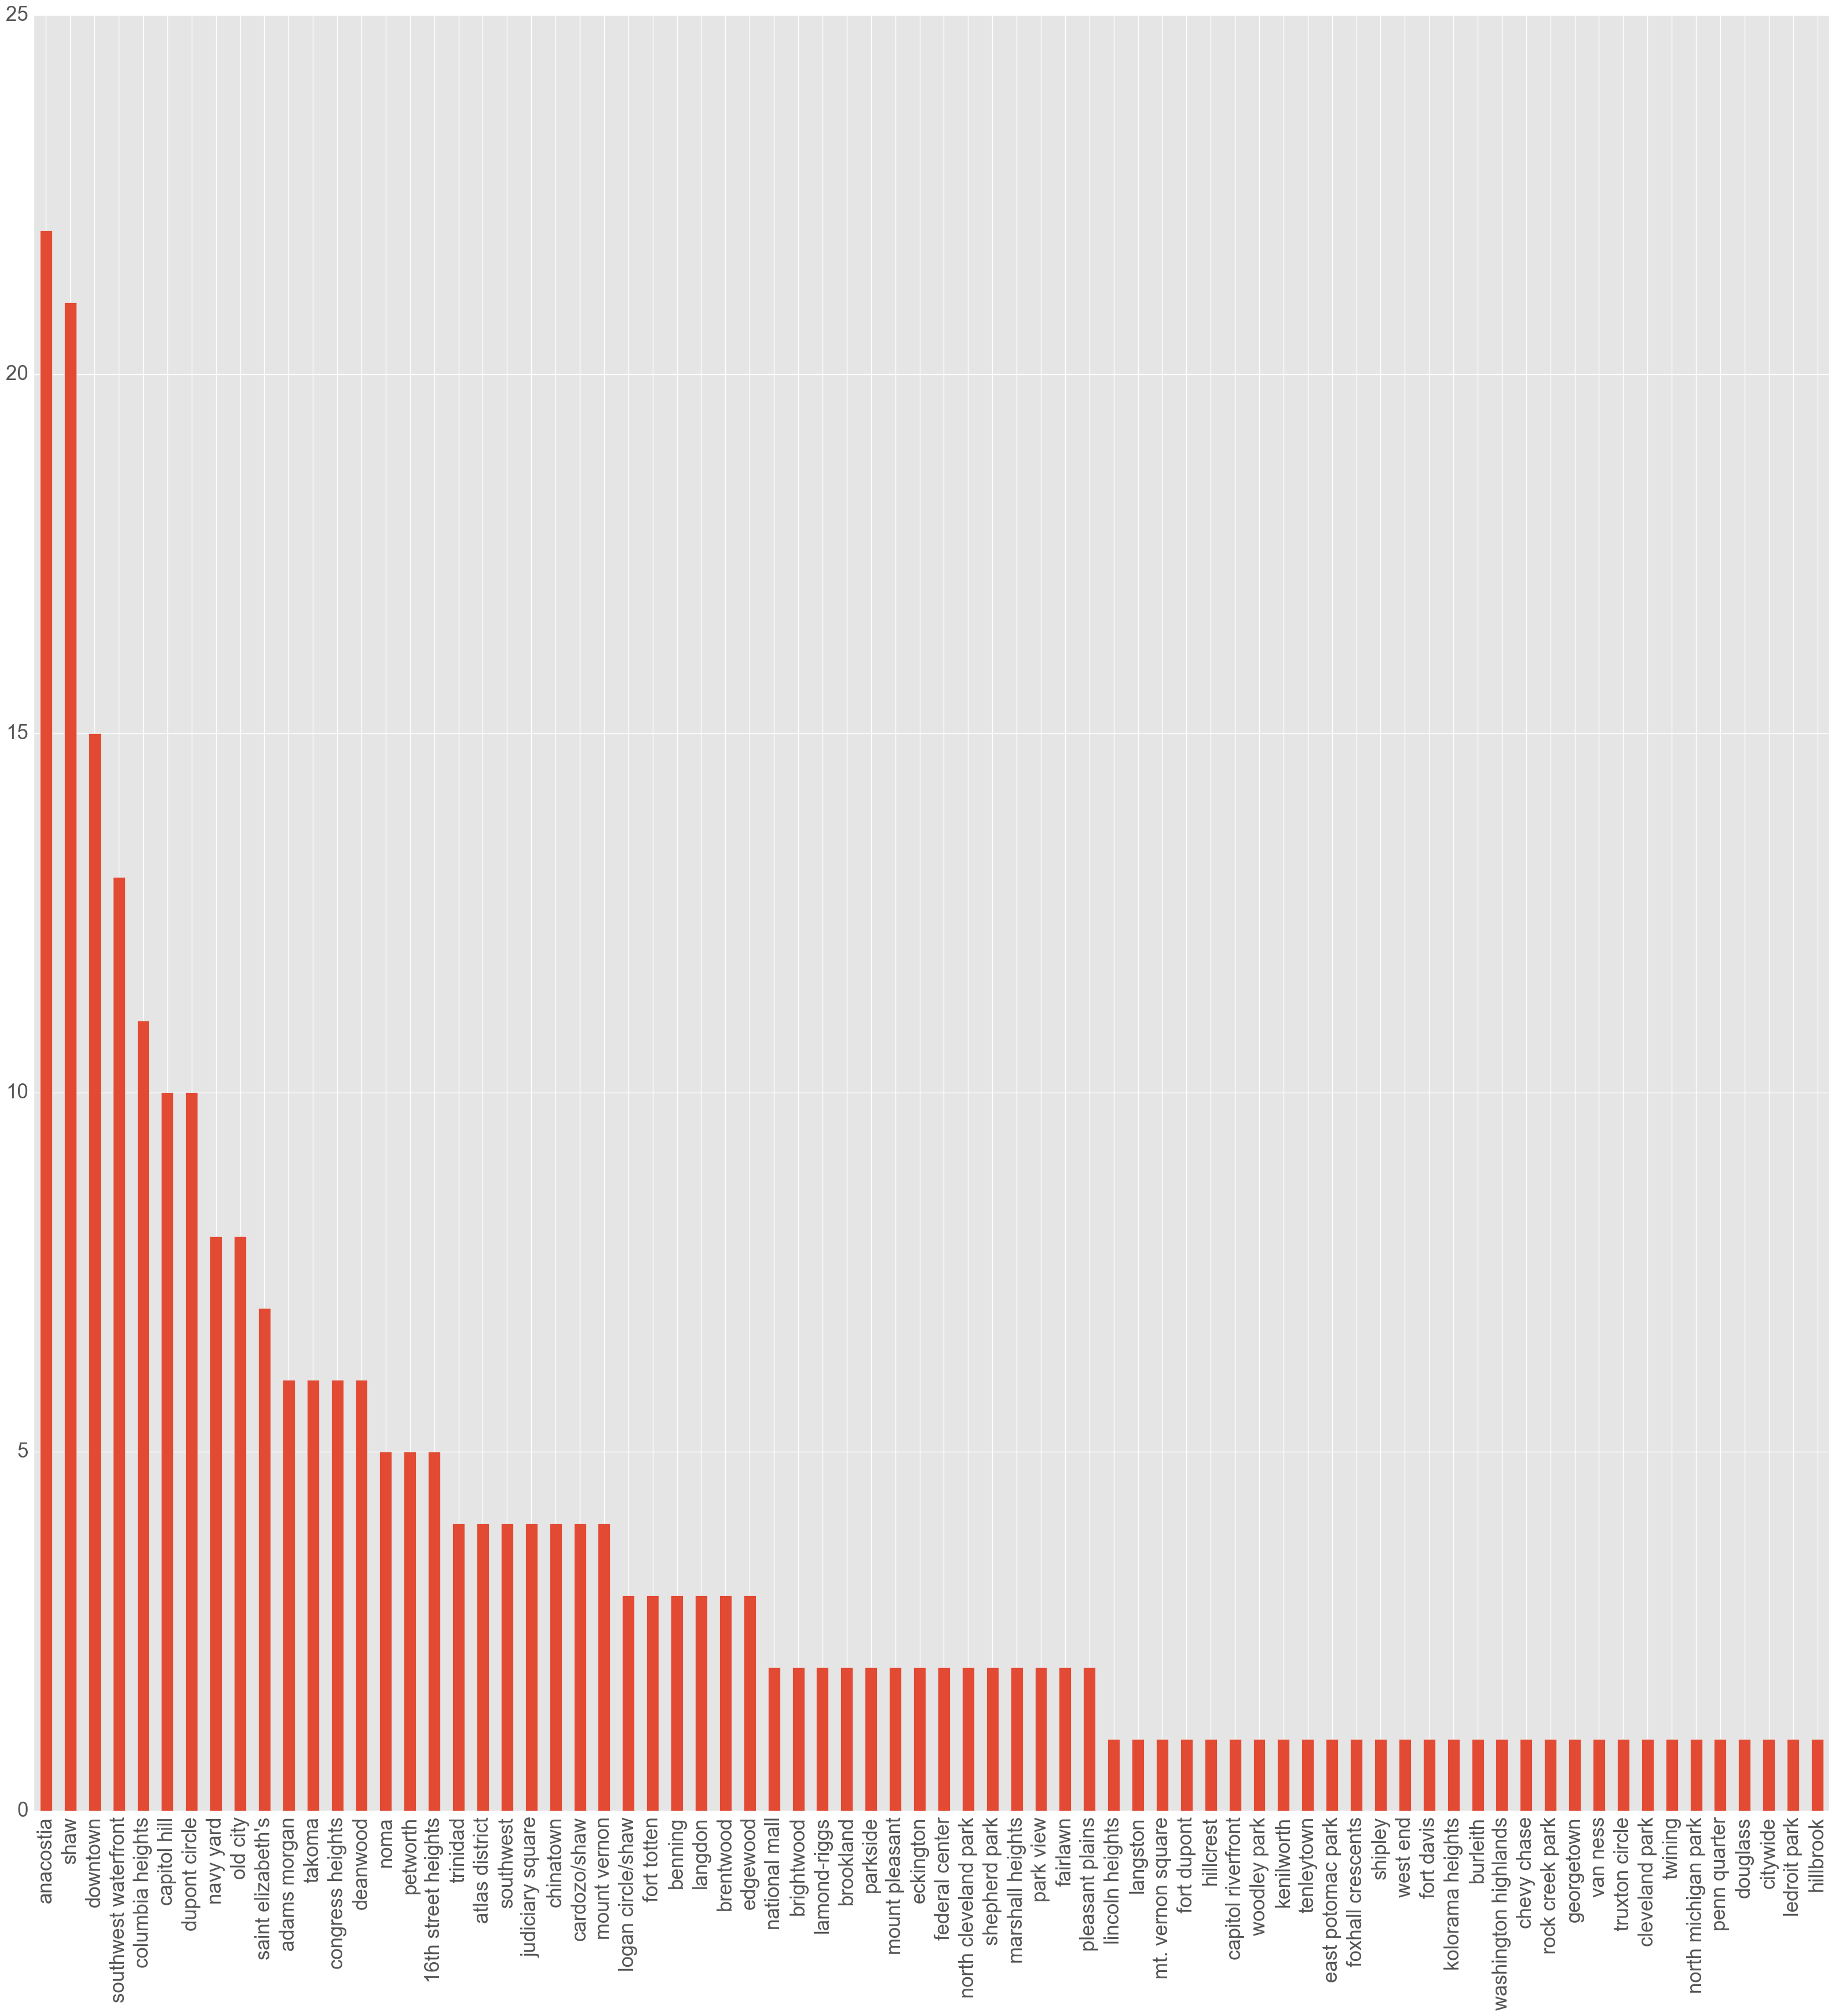

In [41]:
#first counting the number of times each neighbourhood appears in the dataframe, then plotting a bar chart that captures this information and specifying the size of the figure and font so we can see everything
df.neighborhood.value_counts().plot(kind='bar', figsize=(40,40), fontsize=25)

In [43]:
#and if you just want to see the names, here are the top five neighbourhoods with public art
df.neighborhood.value_counts()[:5]

anacostia               22
shaw                    21
downtown                15
southwest waterfront    13
columbia heights        11
Name: neighborhood, dtype: int64

In [44]:
#which WARD has the most public art?
df.ward.value_counts()

6    69
2    42
8    41
1    41
5    23
4    22
7    20
3    10
Name: ward, dtype: int64

#### 2) Were particular mediums of art more popular in certain years?  


In [ ]:
#we're going to use a function to check what the most common and least common mediums are in any given year:
def most_least_common(year): #this defines the function 
    print 'In the year '+ str(year) #this will print out the first line and the year we're looking at
    print df[df['year']==str(year)].medium.value_counts()[:1] #this creates a filtered dataframe of rows in the year we're looking at. It then counts the number of time each medium occurs and we slice that dataframe to only call the first one 
    print 'was most popular'
    print df[df['year']==str(year)].medium.value_counts()[-1:] #this creates the same filtered dataframe, counts the number of time each medium occurs, but only pulls out the last row
    print 'was least popular'

#note: this is obviously not the best way to look at the least popular medium given there are so many things that only occur once, but I wanted to demonstrate how you'd select rows at the bottom of a dataframe!

In [ ]:
most_least_common(2014)

In [ ]:
most_least_common(1998)

In [ ]:
#side question: has the use of paint gone down?
#we're creating a filtered dataframe where the word 'paint' appears in any medium, counting the number of times that occurs per year, sorting our values by the index (year) instead of frequency, and then generating a line plot 
df[df.medium.str.contains('paint')==True].year.value_counts().sort_index().plot(kind='line')

In [ ]:
#i wonder what was really popular in 2012
most_least_common(2012)

#### 3) Which areas have the most permanent exhibits?  


In [ ]:
#to figure this out, let's first convert the 'duration' column to numbers so it's easier to sum up. 
#one of the ways we can do that is to create a dictionary where we assign a number to each string
boolean = {'Temporary': 0, 'Permanent': 1}
#we can then map those values to the 'duration' column so the string values are replaced with the numbers we coded
df['duration'] = df.duration.map(boolean)


In [ ]:
#checking if it worked
df.head()

In [ ]:
#now we can group by wards and then sum up the number of permanent exhibits we have
df.groupby('ward').duration.sum().sort_values(ascending=False)

In [ ]:
#we can also do that by neighbourhood
df.groupby('neighborhood').duration.sum().sort_values(ascending=False)

#### 4) Are certain mediums more common in specific areas?  

In [ ]:
def popular(neighborhood): #this defines the function again
    print 'in', neighborhood #we're asking our function to specify the neighbourhood we're looking for
    print df[df['neighborhood'].str.contains(neighborhood)==True].medium.value_counts()[:5] #this creates a filtered dataframe of rows in the neighbourhood we're looking at. It then counts the number of time each medium occurs and we slice that dataframe to call the top 5  
    print 'were most popular'
#note: by using str.contains(), we're looking for anything that would contain the substring 'shaw' so we can count things like logan circle/shaw

In [ ]:
popular('shaw')

In [ ]:
popular('anacostia')

In [ ]:
#so that doesn't QUITE answer our question, so let's try this:
def common(medium): #this defines the function again
    print 'the medium', medium, 'was most popular in'
    print df[df['medium'].str.contains(medium)==True].neighborhood.value_counts()[:5]  

In [ ]:
common('paint')

In [ ]:
common('wood')

In [ ]:
common('maps')

#### 5) Has there been an increase in the amount of public art in DC over the years?  

In [14]:
#the ability to work with datetime structures is one of the best things about pandas
#you can convert a column to date time by calling pandas.to_datetime(column_name)
df['date'] = pd.to_datetime(df['year'])

In [15]:
df.head()

,x,y,objectid,address,artist,title,medium,year,art_type,display,location,neighborhood,size_,ward,duration,program_source,artwork,date
0,-77.023515,38.914256,1,813 S STREET NW,Richard Colman,Checker Club,Aerosol paint,2011,Mural,"Capitol Pool Checkers Club, located at back of...",813 s street nw,shaw,NaN,1,Temporary,MuralsDC,NaN,2011-01-01
1,-76.986446,38.867187,2,1320 GOOD HOPE ROAD SE,"Helping Inner City Youth Succeed, Hicks",Untitled,Aerosol paint,2009,Mural,African Heritage Center for African Dance & Mu...,1320b good hope road se,anacostia,1209 sq. ft.,8,Temporary,MuralsDC,NaN,2009-01-01
2,-76.995284,38.879775,3,745 8TH STREET SE,Michael Hammond,Depiction of the House’s Go-go Band,Aerosol paint on concrete,2011,Mural,"Sasha Bruce House, mural located on front of b...",745 8th street se,capitol hill,140 sq. feet,6,Permanent,Commissioned Project,NaN,2011-01-01
3,-77.001522,38.957041,4,320 RIGGS ROAD NE,Joel Bergner and Rashad Cuffee,Life Makes Music,Aerosol paint,2008,Mural,Off the intersection at South Dakota Ave NE & ...,357 riggs road ne,petworth,NaN,4,Temporary,Neighborhood Projects,NaN,2008-01-01
4,-77.016780,38.974892,5,314 CARROLL STREET NW,"Words, Beats and Life",Takoma Green,Aerosol paint,2009,Mural,"Elevation 314, mural is located behind 314 Car...",314 carroll street nw,takoma,150 x 10',4,Temporary,Neighborhood Projects,NaN,2009-01-01


In [16]:
#obviously not every piece of art was completed on 1 Jan, and we're only really interested in the year, so let's extract that into our old year column
df['year'] = df['date'].dt.year

In [17]:
df.head()

,x,y,objectid,address,artist,title,medium,year,art_type,display,location,neighborhood,size_,ward,duration,program_source,artwork,date
0,-77.023515,38.914256,1,813 S STREET NW,Richard Colman,Checker Club,Aerosol paint,2011,Mural,"Capitol Pool Checkers Club, located at back of...",813 s street nw,shaw,NaN,1,Temporary,MuralsDC,NaN,2011-01-01
1,-76.986446,38.867187,2,1320 GOOD HOPE ROAD SE,"Helping Inner City Youth Succeed, Hicks",Untitled,Aerosol paint,2009,Mural,African Heritage Center for African Dance & Mu...,1320b good hope road se,anacostia,1209 sq. ft.,8,Temporary,MuralsDC,NaN,2009-01-01
2,-76.995284,38.879775,3,745 8TH STREET SE,Michael Hammond,Depiction of the House’s Go-go Band,Aerosol paint on concrete,2011,Mural,"Sasha Bruce House, mural located on front of b...",745 8th street se,capitol hill,140 sq. feet,6,Permanent,Commissioned Project,NaN,2011-01-01
3,-77.001522,38.957041,4,320 RIGGS ROAD NE,Joel Bergner and Rashad Cuffee,Life Makes Music,Aerosol paint,2008,Mural,Off the intersection at South Dakota Ave NE & ...,357 riggs road ne,petworth,NaN,4,Temporary,Neighborhood Projects,NaN,2008-01-01
4,-77.016780,38.974892,5,314 CARROLL STREET NW,"Words, Beats and Life",Takoma Green,Aerosol paint,2009,Mural,"Elevation 314, mural is located behind 314 Car...",314 carroll street nw,takoma,150 x 10',4,Temporary,Neighborhood Projects,NaN,2009-01-01


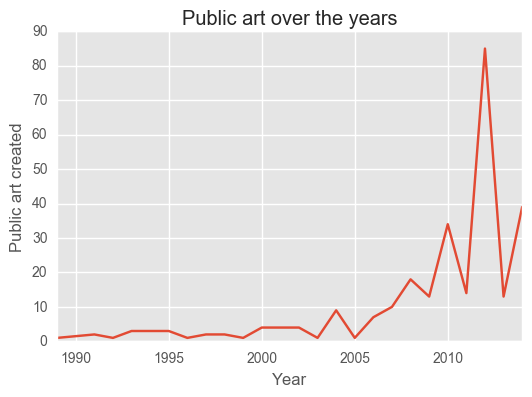

In [49]:
df.year.value_counts().sort_index().plot(kind='line')
plt.xlabel("Year")
plt.ylabel("Public art created")
plt.title("Public art over the years")

In [52]:
df_city_arts = pd.read_csv('/Users/rb/Downloads/2015_City_Arts_Projects_Individual.csv')

In [54]:
df_city_arts.head()

,X,Y,OBJECTID,FISCAL_YEAR,INDIVIDUAL,ORGANIZATION,ZIP_4,GRANT_CATEGORY,DISCIPLINE,GRANT_,URL,WARD
0,-77.033017,38.932914,657,2015,Edward Daniels,NaN,20010,City Arts Projects (Individual),Theatre,8000,NaN,1
1,-77.001372,38.846875,680,2015,Dwayne Lawson-Brown,NaN,20032,City Arts Projects (Individual),Poetry,7350,http://crochetkingpin.com,8
2,-77.029105,38.960279,692,2015,Denaise Seals,NaN,20011-2823,City Arts Projects (Individual),Video,4050,http://slingshotvideo.com,4
3,-76.937763,38.903857,693,2015,Shawn Short,NaN,20019,City Arts Projects (Individual),Dance,7500,http://ddtdc.org,7
4,-77.014496,38.909852,716,2015,Sandra Johnson,NaN,20001,City Arts Projects (Individual),Jazz Music,8000,http://sandrayjohnson.com,5


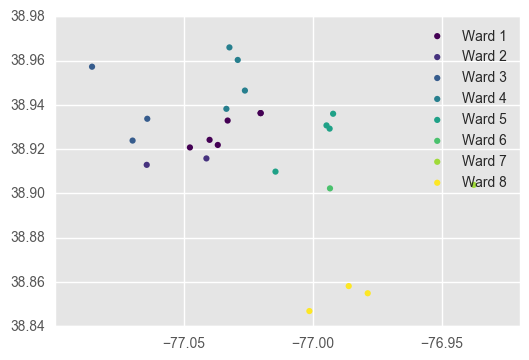

In [58]:
cmap = plt.cm.viridis #this sets the colourmap we want
norm = plt.Normalize(df_city_arts['WARD'].values.min(), df_city_arts['WARD'].values.max()) #this normalizes our colourmap (sets all the values between 0 and 1)

for i, dff in df_city_arts.groupby("WARD"): #we iterate through a filtered dataframe
    plt.scatter(dff['X'], dff['Y'], c=cmap(norm(dff['WARD'])), #then say that we want a scatter plot of x against y with each ward as a colour
                edgecolors='none', label="Ward {:g}".format(i)) #and then we specify that our labels should say "Ward + ward number"

plt.legend() #this is what we add to make sure we can see a legend

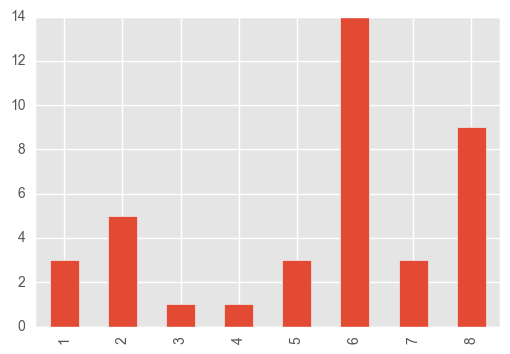

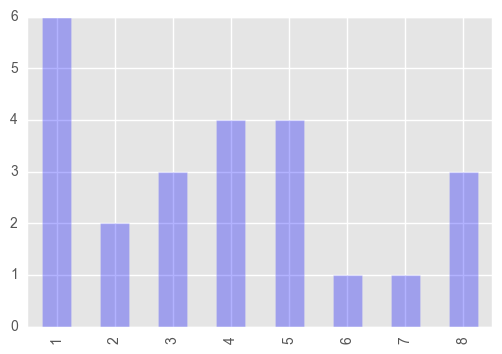

In [83]:
#we've only got information for 2015, but how much of the public art was in each ward in 2014? and how many city arts award were given out by ward?
df[df.year==2014].ward.value_counts().sort_index().plot(kind='bar')
plt.show()
df_city_arts.WARD.value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.3)

In [84]:
#let's throw in a few more grants/awards too
df_upstart_grants = pd.read_csv('/Users/rb/Downloads/2015_Upstart_Grants.csv')

In [85]:
df_artist_fellows = pd.read_csv('/Users/rb/Downloads/2015_Artist_Fellowship_Program.csv')

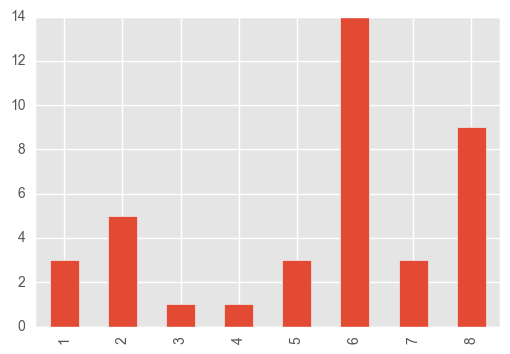

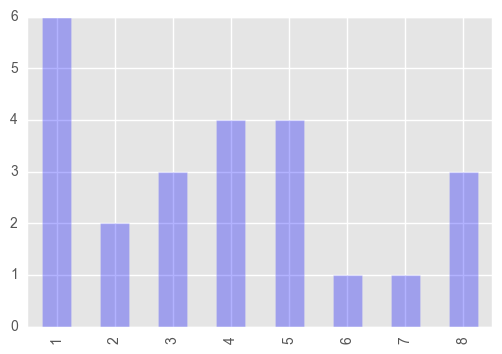

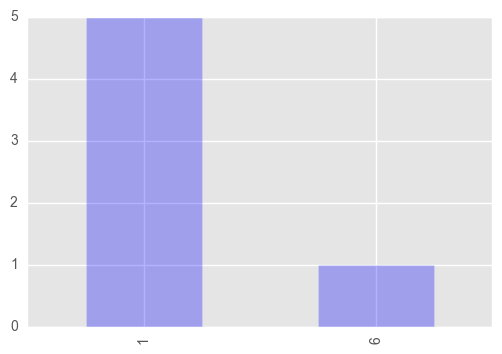

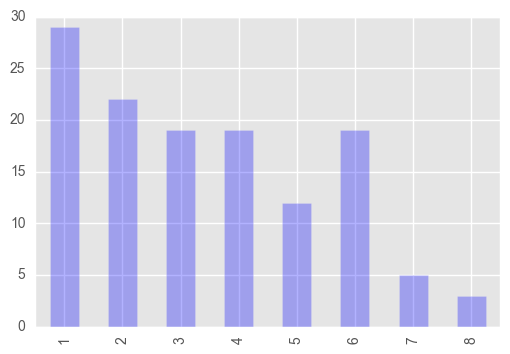

In [86]:

df[df.year==2014].ward.value_counts().sort_index().plot(kind='bar')
plt.show()
df_city_arts.WARD.value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.3)
plt.show()
df_upstart_grants.WARD.value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.3)
plt.show()
df_artist_fellows.WARD.value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.3)
plt.show()